In [51]:
import pandas as pd

df = pd.read_csv("./training_data.csv", encoding='cp1252')

df.head()

,OBS_ID,KANAL,SHOW_ID,SHOW_DATUM,FAKTOR,WORDING_ID,BRAND_FLG,BRAND_ID,WDHL_FLG,BESTELL_ID,...,WGH3_DESC,WGH4_DESC,DIVISION_DESC_SORT,PREISKLASSE_DESC,PREIS_LABEL_DESC,FARBE,GROESSE,MENGE_FREI_SHOWBEGINN,BEWERTUNG,SOLD_OUT_FLG
0,235691,DIG,370117,30.07.2017 19:00:00,1,25802,1,12.0,1,399879,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"04 - 40 bis 49,99",NaN,SCHWARZ,NaN,7,NaN,1
1,235692,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,36,8,NaN,1
2,235693,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,38,23,NaN,1
3,235694,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,40,39,NaN,0
4,235695,DIG,372896,04.08.2017 09:00:00,1,34013,0,NaN,0,399890,...,WGH-Stufe Marken National,WGH-Stufe Mode,Mode,"05 - 50 bis 74,99",NaN,SCHWARZ,42,44,NaN,0


In [56]:
X = df[["SHOW_POSITION", "MENGE_FREI_SHOWBEGINN", "ADT_FLG"]].values
y = df[["SOLD_OUT_FLG"]].values
       
       
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [57]:
# scaling the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


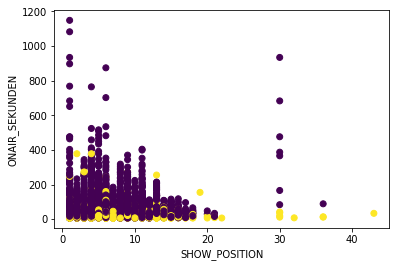

In [58]:
# plot the different input parameters

% matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y.ravel())
plt.xlabel("SHOW_POSITION")
plt.ylabel("ONAIR_SEKUNDEN")
plt.show()

In [59]:
# run the logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print(model.score(X_test, y_test)) # shows how many percent of the dataset was predicted correctly

y_predicted = model.predict(X_test)

0.7707082833133253


/Users/floriansonneck/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


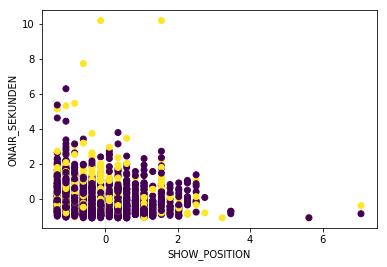

In [49]:
# plot the test dataset

% matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.ravel())
plt.xlabel("SHOW_POSITION")
plt.ylabel("ONAIR_SEKUNDEN")
plt.show()

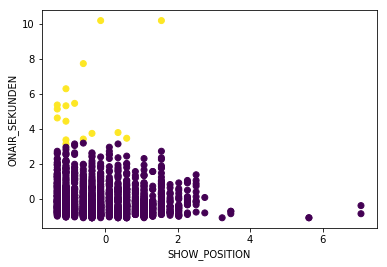

In [50]:
% matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_predicted.ravel())
plt.xlabel("SHOW_POSITION")
plt.ylabel("ONAIR_SEKUNDEN")
plt.show()